### EDA on Agricultural Land 

In [3]:
import pandas as pd 
import seaborn as sns 
import numpy as np 

#load the Agricultural data
agri_df = pd.read_csv("Agri_data_worldbank.csv")

#load the other associated data 
agri_meta_df = pd.read_csv("metadata_agri_data_worldbank.csv")



In [4]:
agri_df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,20.0,20.0,20.0,20.0,20.0,...,20.000,20.0,20.000,20.00,20.00,20.00,20.00,20.00,NaN,NaN
1,Africa Eastern and Southern,AFE,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,6170420.0,6167940.0,6173000.0,6170130.0,6167390.0,...,6825399.195,6836525.8,6851382.225,6868999.45,6882362.22,6891016.22,6898158.22,6900855.82,NaN,NaN
2,Afghanistan,AFG,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,377500.0,378000.0,378500.0,379050.0,379100.0,...,379100.000,379100.0,379100.000,379100.00,380100.00,380100.00,383130.00,383130.00,NaN,NaN


In [5]:
#check for NAN values
agri_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            255 non-null    float64
 6   1962            255 non-null    float64
 7   1963            255 non-null    float64
 8   1964            255 non-null    float64
 9   1965            255 non-null    float64
 10  1966            255 non-null    float64
 11  1967            255 non-null    float64
 12  1968            255 non-null    float64
 13  1969            255 non-null    float64
 14  1970            255 non-null    float64
 15  1971            255 non-null    float64
 16  1972            255 non-null    float64
 17  1973            255 non-null    flo

In [6]:
agri_meta_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  127 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.6+ KB


In [7]:
merged1_df= pd.merge(agri_df, agri_meta_df, on= "Country Code", how= "inner")

In [8]:
merged1_df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2019,2020,2021,2022,2023,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,20.0,20.0,20.0,20.0,20.0,...,20.00,20.00,20.00,NaN,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Africa Eastern and Southern,AFE,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,6170420.0,6167940.0,6173000.0,6170130.0,6167390.0,...,6891016.22,6898158.22,6900855.82,NaN,NaN,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,Afghanistan,AFG,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,377500.0,378000.0,378500.0,379050.0,379100.0,...,380100.00,383130.00,383130.00,NaN,NaN,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN


In [9]:
# drop the Unnamed:5 column
merged1_df.drop("Unnamed: 5", axis=1, inplace=True)

In [10]:
merged1_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName'],
      dtype='object')

In [11]:
new_order_df= ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','Region', 'IncomeGroup', 'SpecialNotes', 'TableName','1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023']

In [12]:
new_merged_df= merged1_df[new_order_df]

In [13]:
new_merged_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Region', 'IncomeGroup', 'SpecialNotes', 'TableName', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [14]:
new_merged_df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,IncomeGroup,SpecialNotes,TableName,1960,1961,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Agricultural land (sq. km),AG.LND.AGRI.K2,Latin America & Caribbean,High income,NaN,Aruba,NaN,20.0,...,20.000,20.0,20.000,20.00,20.00,20.00,20.00,20.00,NaN,NaN
1,Africa Eastern and Southern,AFE,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN,6170420.0,...,6825399.195,6836525.8,6851382.225,6868999.45,6882362.22,6891016.22,6898158.22,6900855.82,NaN,NaN
2,Afghanistan,AFG,Agricultural land (sq. km),AG.LND.AGRI.K2,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN,377500.0,...,379100.000,379100.0,379100.000,379100.00,380100.00,380100.00,383130.00,383130.00,NaN,NaN


In [20]:
new_merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    265 non-null    object 
 1   Country Code    265 non-null    object 
 2   Indicator Name  265 non-null    object 
 3   Indicator Code  265 non-null    object 
 4   Region          217 non-null    object 
 5   IncomeGroup     216 non-null    object 
 6   SpecialNotes    127 non-null    object 
 7   TableName       265 non-null    object 
 8   1960            0 non-null      float64
 9   1961            255 non-null    float64
 10  1962            255 non-null    float64
 11  1963            255 non-null    float64
 12  1964            255 non-null    float64
 13  1965            255 non-null    float64
 14  1966            255 non-null    float64
 15  1967            255 non-null    float64
 16  1968            255 non-null    float64
 17  1969            255 non-null    flo

## clean the new merged df 

In [26]:
# new_merged_df.drop("1960", axis=1, inplace=True)
# new_merged_df.drop("SpecialNotes", axis=1, inplace=True)

In [27]:
new_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    265 non-null    object 
 1   Country Code    265 non-null    object 
 2   Indicator Name  265 non-null    object 
 3   Indicator Code  265 non-null    object 
 4   Region          217 non-null    object 
 5   IncomeGroup     216 non-null    object 
 6   TableName       265 non-null    object 
 7   1961            255 non-null    float64
 8   1962            255 non-null    float64
 9   1963            255 non-null    float64
 10  1964            255 non-null    float64
 11  1965            255 non-null    float64
 12  1966            255 non-null    float64
 13  1967            255 non-null    float64
 14  1968            255 non-null    float64
 15  1969            255 non-null    float64
 16  1970            255 non-null    float64
 17  1971            255 non-null    flo

In [33]:
df = new_merged_df.copy()

In [47]:
df_null  = df[df.isnull().sum()[df.isnull().sum()>0].index]

In [48]:
df_null.head()

,Region,IncomeGroup,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Latin America & Caribbean,High income,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.000,20.000,20.000,20.000,20.000,20.000,20.000,20.000,20.00,20.00
1,NaN,NaN,6170420.0,6167940.0,6173000.0,6170130.0,6167390.0,6170970.0,6172710.0,6177330.0,...,6789159.825,6806324.255,6825399.195,6836525.800,6851382.225,6868999.450,6882362.220,6891016.220,6898158.22,6900855.82
2,South Asia,Low income,377500.0,378000.0,378500.0,379050.0,379100.0,379550.0,379790.0,379800.0,...,379140.000,379100.000,379100.000,379100.000,379100.000,379100.000,380100.000,380100.000,383130.00,383130.00
3,NaN,NaN,2975436.6,2980116.6,2983536.6,2987026.6,2991566.6,2993116.6,2993716.6,3004636.6,...,3529813.266,3558354.354,3566587.601,3584392.737,3593613.009,3599340.982,3618614.614,3627121.603,3633870.46,3641770.46
4,Sub-Saharan Africa,Lower middle income,451770.0,451850.0,451820.0,451900.0,451870.0,451950.0,452020.0,452100.0,...,453030.000,454880.000,456740.000,457890.000,458240.000,457720.000,457920.000,458770.000,458920.00,458970.00


<Axes: >

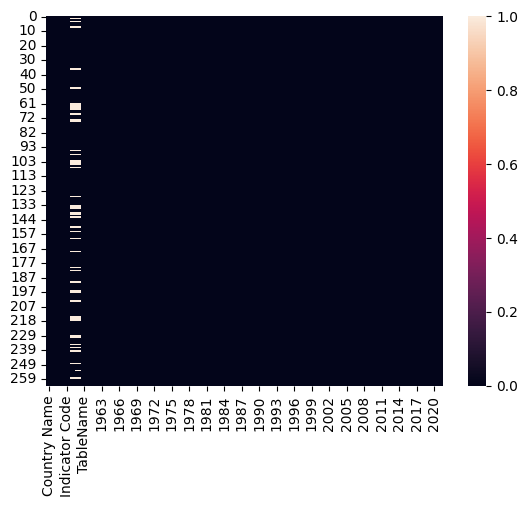

In [52]:
sns.heatmap(df_filter.isnull())

In [51]:
df_row_null =  df.isnull().mean(axis=1)

df_filter= df[df_row_null <= 0.1]

In [ ]:
# df.drop("2022", axis=1, inplace=True)
# df.drop("2023", axis=1, inplace=True)

In [16]:
new_merged_df["IncomeGroup"].value_counts()

IncomeGroup
High income            85
Upper middle income    54
Lower middle income    51
Low income             26
Name: count, dtype: int64

In [17]:
new_merged_df["IncomeGroup"].isna().sum()

np.int64(49)

In [55]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 0 to 264
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    255 non-null    object 
 1   Country Code    255 non-null    object 
 2   Indicator Name  255 non-null    object 
 3   Indicator Code  255 non-null    object 
 4   Region          207 non-null    object 
 5   IncomeGroup     206 non-null    object 
 6   TableName       255 non-null    object 
 7   1961            255 non-null    float64
 8   1962            255 non-null    float64
 9   1963            255 non-null    float64
 10  1964            255 non-null    float64
 11  1965            255 non-null    float64
 12  1966            255 non-null    float64
 13  1967            255 non-null    float64
 14  1968            255 non-null    float64
 15  1969            255 non-null    float64
 16  1970            255 non-null    float64
 17  1971            255 non-null    float64


# Countries which had to remove from the analysis because of no information

In [71]:
missing= df[~df['Country Code'].isin(df_filter['Country Code'])]

name_missing_country= missing["Country Name"].tolist()

print(name_missing_country)

['Curacao', 'Eritrea', 'Gibraltar', 'Luxembourg', 'Macao SAR, China', 'St. Martin (French part)', 'Monaco', 'South Sudan', 'Sint Maarten (Dutch part)', 'Kosovo']


In [81]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 0 to 264
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    255 non-null    object 
 1   Country Code    255 non-null    object 
 2   Indicator Name  255 non-null    object 
 3   Indicator Code  255 non-null    object 
 4   Region          207 non-null    object 
 5   IncomeGroup     206 non-null    object 
 6   TableName       255 non-null    object 
 7   1961            255 non-null    float64
 8   1962            255 non-null    float64
 9   1963            255 non-null    float64
 10  1964            255 non-null    float64
 11  1965            255 non-null    float64
 12  1966            255 non-null    float64
 13  1967            255 non-null    float64
 14  1968            255 non-null    float64
 15  1969            255 non-null    float64
 16  1970            255 non-null    float64
 17  1971            255 non-null    float64


In [83]:
df_filter.isnull().mean()*100

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
Region            18.823529
                    ...    
2017               0.000000
2018               0.000000
2019               0.000000
2020               0.000000
2021               0.000000
Length: 68, dtype: float64

<Axes: xlabel='Region'>

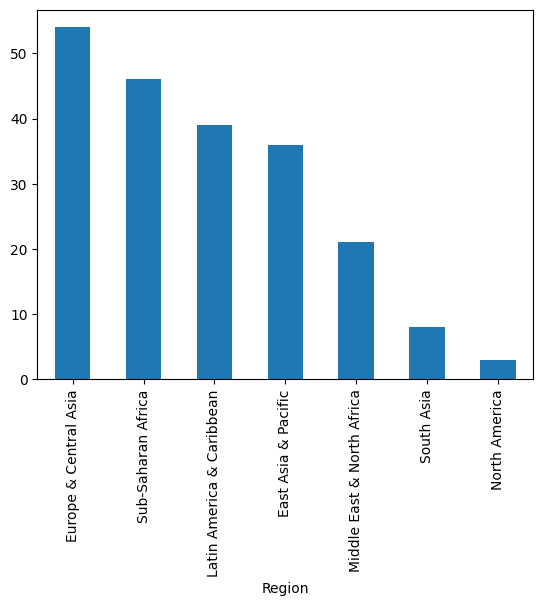

In [84]:
df_filter["Region"].value_counts().plot(kind= "bar")

Since the mode is not veri prominent we cannot use simple impute with most frequent value and this is also evident when we see the percentage of null values in region column as the null value percentage is more than 5%. So in such case we will make another region variable names MISSING so that the algorithm understands that we don't have the necessary data for the missing rows

In [ ]:
df_filter["Region"].fillna("Missing", inplace= True)

<Axes: xlabel='Region'>

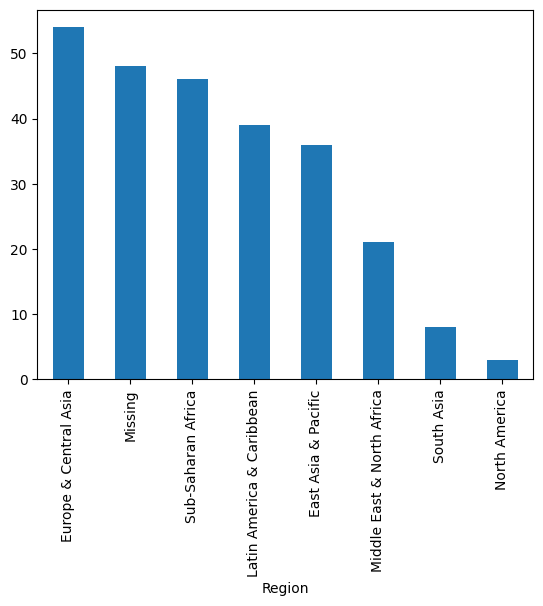

In [86]:
df_filter["Region"].value_counts().plot(kind= "bar")

In [87]:
df_filter["IncomeGroup"].isnull().mean()*100

np.float64(19.215686274509807)

Again we see the same trend, we now do the same treatment for the IncomeGroup as well


In [ ]:
df_filter["IncomeGroup"].fillna("Missing", inplace= True)


<Axes: xlabel='IncomeGroup'>

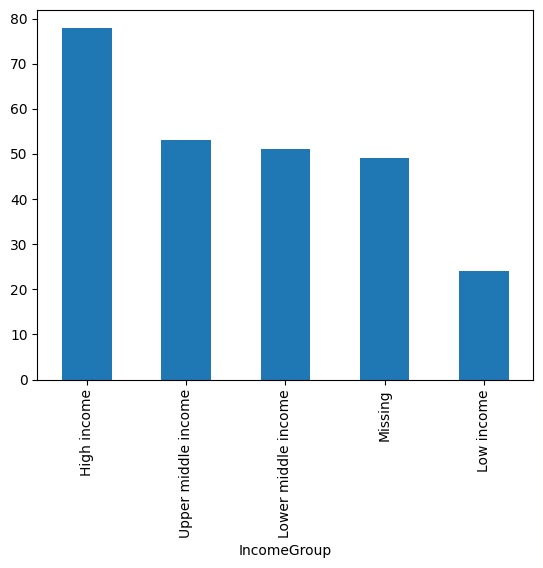

In [91]:
df_filter["IncomeGroup"].value_counts().plot(kind= "bar")

In [96]:
#No more missing values in the dataframe
(df_filter.isnull().sum()).sum()

np.int64(0)